In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

The data for this model is the [Car Price dataset](https://www.kaggle.com/code/snikhil17/car-price-pridiction).

In [209]:
df = pd.read_csv("data/car_price/data.csv")

In [210]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [212]:
# Fix the column names
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

# Fix the string values
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [213]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## EDA

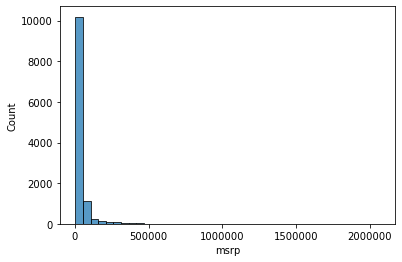

In [214]:
sns.histplot(df.msrp, bins=40);
plt.ticklabel_format(style='plain', axis='x')

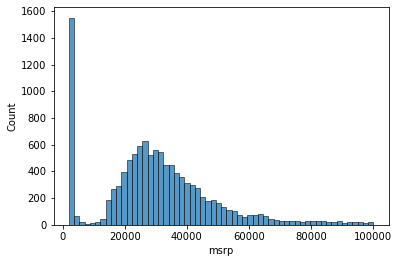

In [215]:
sns.histplot(x='msrp', data=df[df.msrp < 100000]);

In [216]:
log_price = np.log1p(df.msrp)

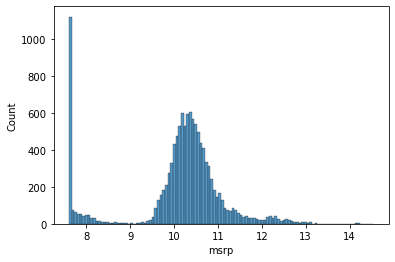

In [217]:
sns.histplot(log_price);

In [218]:
# Checking for missing values

df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

<AxesSubplot:xlabel='popularity', ylabel='Count'>

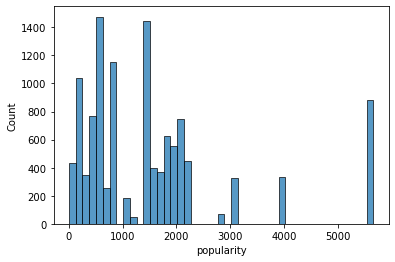

In [219]:
sns.histplot(df['popularity'])

## Validation

In [220]:
n_rows = df.shape[0]

n_val = int(0.2 * n_rows)
n_test = int(0.2 * n_rows)
n_train = n_rows - (n_val + n_test)

In [221]:
assert n_train + n_val + n_test == n_rows

In [222]:
np.random.seed(2)
idx = np.arange(n_rows)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

In [223]:
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_val:].copy()

In [224]:
y_train = np.log1p(df_train.msrp)
y_val = np.log1p(df_val.msrp)
y_test = np.log1p(df_test.msrp)

## Baseline model

In [225]:
cols_base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 
             'city_mpg', 'popularity'
]

df_num = df_train[cols_base]

In [226]:
# Imputing missing data
df_num = df_num.fillna(0)

In [227]:
X_train = df_num.values

In [228]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [229]:
y_predict = model.predict(X_train)

In [230]:
rmse = mean_squared_error(y_train, y_predict, squared=False)
print(f"RMSE: {rmse}")

RMSE: 0.7554192603920132


In [231]:
# Now we use the validation data

df_num = df_val[cols_base]
df_num = df_num.fillna(0)
X_val = df_num.values

In [232]:
y_predict = model.predict(X_val)

rmse = mean_squared_error(y_val, y_predict, squared=False)
print(f"RMSE: {rmse}")

RMSE: 0.7616530991301576


## Feature engineering

In [233]:
cols_base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 
             'city_mpg', 'popularity', 'age'
]

df_train['age'] = 2017 - df_train.year
df_val['age'] = 2017 - df_val.year

# One-hot encoding of num_doors feature
for v in [2, 3, 4]:
    feature = "num_doors_%s" % v
    value = (df_train['number_of_doors'] == v).astype(int)
    df_train[feature] = value

    value = (df_val['number_of_doors'] == v).astype(int)
    df_val[feature] = value

    cols_base.append(feature)

for v in ["chevrolet", "ford", "volkswagen", "toyota", "dodge"]:
    feature = "is_make_%s" % v
    value = (df_train['make'] == v).astype(int)
    df_train[feature] = value

    value = (df_val['make'] == v).astype(int)
    df_val[feature] = value

    cols_base.append(feature)

In [234]:
df_num = df_train[cols_base]
df_num_val = df_val[cols_base]

df_num = df_num.fillna(0)
df_num_val = df_num_val.fillna(0)

X_train = df_num.values
X_val = df_num_val.values

In [235]:
model = LinearRegression()
model.fit(X_train, y_train)

y_predict = model.predict(X_val)

rmse = mean_squared_error(y_val, y_predict, squared=False)
print(f"RMSE: {rmse}")

RMSE: 0.5076038849557342
